In [1]:
using Plots
using EmpiricalBayes
using CSV
using DataFrames
using Distributions
using LaTeXStrings
using JLD2
using Nullables
using Random: seed!
using StatsBase
using KernelDensity

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
┌ Info: Recompiling stale cache file /Users/ignatiad/.julia/compiled/v0.7/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1185


In [2]:
pgfplots()

Plots.PGFPlotsBackend()

In [3]:
chetty = CSV.read("datasets/chetty_hendren2005.csv", types=Dict(3=>String));

idx = [!ismissing(x) for x in chetty[:p25_coef]]
β_hat = [chetty[i,:p25_coef] for i in findall(idx)]
se_hat = [chetty[i,:p25_se] for i in findall(idx)]
z_scores = β_hat./se_hat;
Xs = z_scores;

In [17]:
length(Xs)

595

In [4]:
xs = Float64.(collect(-3:0.2:3));

In [5]:
@load "cached_results/chetty_post_mean_Jan10.jld2"

1-element Array{Symbol,1}:
 :post_mean_cis

In [6]:
left_ci_post_mean = [t.ci_left for t in post_mean_cis]
right_ci_post_mean =  [t.ci_right for t in post_mean_cis]
point_est_post_mean  = [t.calibrated_target for t in post_mean_cis];

-1.8396215782690255

In [7]:
pilot_post_mean = [t.est_target for t in post_mean_cis];

In [8]:
mycols =["#424395" "#EB549A" "#5EC2DA" "#EBC915" "#018AC4"  "#550133"]

1×6 Array{String,2}:
 "#424395"  "#EB549A"  "#5EC2DA"  "#EBC915"  "#018AC4"  "#550133"

In [51]:
brad_non_null =  fit(BradDeconvolveR, Xs, prior_grid=range(-3.6, stop=3.6, length=361);
    deltaAt = :nothing, pDegree=10)
x_grid = collect(linspace(-3,3,401))
post_mean_brad_non_null = [estimate(brad_non_null, PosteriorTarget(PosteriorMeanNumerator(x))) for x in x_grid];

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[51]:3
└ @ Core In[51]:3


┌ Warning: `replace(s::AbstractString, pat, f)` is deprecated, use `replace(s, pat => f)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574
┌ Warning: broadcast will default to iterating over its arguments in the future. Wrap arguments of
│ type `x::PGFPlots.Axis` with `Ref(x)` to ensure they broadcast as "scalar" elements.
│   caller = ip:0x0
└ @ Core :-1


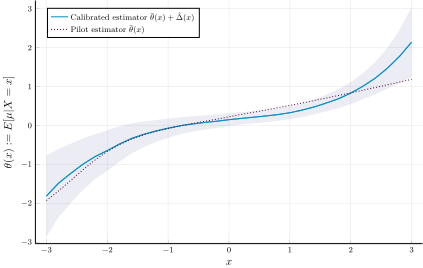

In [9]:
plot(xs, [point_est_post_mean point_est_post_mean],
          fillrange=[left_ci_post_mean right_ci_post_mean],
          fillalpha=0.1, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) := E[\mu | X=x]",
          xlabel=L"x")
plot!(xs, [point_est_post_mean pilot_post_mean],
          line=([:solid :dot]),
          color=[mycols[5] mycols[6]], #marker=:circlemmarkerstrokealpha =0,
          legend=:topleft, 
          label=[L"Calibrated estimator $\bar{\theta}(x) + \hat{\Delta}(x)$" L"Pilot estimator $\bar{\theta}(x)$"])

In [10]:
@load "cached_results/chetty_lfsr_cis_Jan10.jld2"

1-element Array{Symbol,1}:
 :lfsr_cis

In [14]:
left_ci_lfsr = [t.ci_left for t in lfsr_cis]
right_ci_lfsr =  min.(1,[t.ci_right for t in lfsr_cis])
point_est_lfsr  = [t.calibrated_target for t in lfsr_cis];
pilot_lfsr = [t.est_target for t in lfsr_cis];

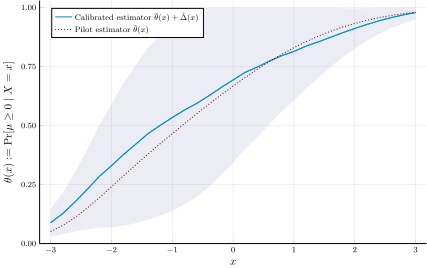

In [15]:
plot(xs, [point_est_lfsr point_est_lfsr],
          fillrange=[left_ci_lfsr right_ci_lfsr],
          fillalpha=0.1, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) := \Pr[\mu \geq 0 \mid X=x]",
          xlabel=L"x")
plot!(xs, [point_est_lfsr pilot_lfsr],
          line=([:solid :dot]),
          color=[mycols[5] mycols[6]], #marker=:circlemmarkerstrokealpha =0,
          legend=:topleft, 
          label=[L"Calibrated estimator $\bar{\theta}(x) + \hat{\Delta}(x)$" L"Pilot estimator $\bar{\theta}(x)$"])

In [32]:
last_ci = post_mean_cis[25];

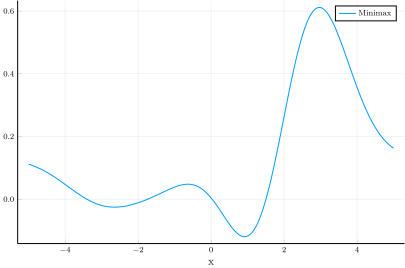

In [36]:
plot(last_ci.est_denom_linear)

In [34]:
last_ci.est_num, last_ci.est_denom

(-0.0037809724297188695, 0.019135209546042583)